# Tutorial 4: Natural chromaticity

# Python libraries 

In [14]:
#########################################
# Python libraries                      #
#########################################
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

#########################################
# Cpymad library                        #
#########################################
from cpymad.madx import Madx 

# Launching MAD-X

In [15]:
# madx = Madx(stdout=True)
madx = Madx()


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.09.00  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2023.05.05               +
  + Execution date: 2024.01.03 11:48:57      +
  ++++++++++++++++++++++++++++++++++++++++++++


# Questions

#### 1. Run the Tutorial4.madx file to compute the twiss of the new thin lens lattice. Using the chromaticities obtained, compute the tunes for $\Delta p / p = 10^{-3}$

#### $\Delta Q = dq* \frac{\Delta p}{p}$


#### First, we run the Tutorial4.madx file

In [16]:
madx.call('Tutorial4.madx')

! *********************************************************************

! Definition of parameters

! *********************************************************************



l_cell=100;

quadrupoleLength=5;

dipoleLength=15;

cellLength=100;

nBend=736;



myKF=2.8/l_cell/quadrupoleLength;

myKD:=-2.8/l_cell/quadrupoleLength;



myAngle:=2*pi/nBend;



! *********************************************************************

! Definition of magnets

! ********************************************************************* 



QF: quadrupole, L=quadrupoleLength, K1:=myKF;

QD: quadrupole, L=quadrupoleLength, K1:=myKD;

BM: sbend, L=dipoleLength, angle:=myAngle; 



! *********************************************************************

! Definition of sequence

! *********************************************************************



myCell:sequence, refer=centre, L=l_cell; ! Here the reference is set to the centre of the element in order to use the makethin command

q1: QF, at=0+quadr

#### Now we can compute the detuning effect on an off-momentum particle

#### **REMEMBER** That the derivative functions in MAD-X are normalized by the relativistic factor beta.

#### We could assume ultra-relativistic beam.

#### In MAD-X the chromaticity and second momentum derivatives are normalized by the relativistic factor $\beta$

#### Pythonic approach to get the relativistic beta factor for our beam

In [17]:
beta_rel=madx.sequence['mycell'].beam.beta
print (beta_rel)

0.9999999910167906


#### Obtained chromaticity

In [18]:
dq1_ref=madx.table['summ'].dq1[0]
print(dq1_ref)

-0.3181068347940339


#### Variation on the tune for an off-momentum particle of 1e-3

In [17]:
dq1_ref*beta_rel*1e-3

-0.0003177280054266581

#### This detuning is quite important, this is something that we will see more clear when tracking particles in the lattice

In [19]:
#Tune for on-momentum particles
tune_onmomentum=madx.table['summ'].q1[0]
print ("On-momentum tune")
print(tune_onmomentum)

#Tune for off-momentum particles
tune_offmomentum=madx.table['summ'].q1[0]-0.00031
print("Off-momentum tune")
print(tune_offmomentum)

On-momentum tune
0.2500001233433213
Off-momentum tune
0.24969012334332127


#### 2. Track two particles, one with initial coordinates x, y, px, py = (1 mm, 1 mm, 0, 0) and another one with initial coordinates x, y, px, py = (100 mm, 100 mm, 0, 0) in 100 turns. Plot the horizontal and vertical phase space, x-px and y-py respectively. How do the particles move in the phase space turn after turn? Do you see the tunes? Do you see any difference between the two particles? It may help to look only at the first 4 turns to get a clear picture.

		track, dump, file = name, deltap = ??;
		start, x = ??, px = ?? , y = ??, py = ??;
		start, x = ??, px = ?? , y = ??, py = ??;
		run, turns = 100;
        

In [20]:
myString='''

!*********************************************************************
! TRACKING
!*********************************************************************

track,dump,file='linear_machine', DELTAP=0;
start, x= 1e-3, px=0, y= 1e-3, py=0;
start, x= 1e-1, px=0, y= 1e-1, py=0;
run,turns=100;
endtrack;

'''
madx.input(myString);

enter TRACK module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

Full 6D closed orbit search.
Initial value of 6-D closed orbit from Twiss: 
orbit0   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
  Singular matrix occurred during closed orbit search.

6D closed orbit found by subroutine trclor 
iteration:   2 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: tracksumm

    number       turn                  x                 px 
         1          0              0.001                  0 
         2          0                0.1                  0 
         1        100    0.0009998138934   -3.218533371e-09 
         2        100      0.09938084601    -1.07214511e-05 

                 y                 py                  t                 

#### When activating the option dump on the track module a new table is generated by MAD-X with the tracking results for each particle at the defined observables. In this example, only one observable is defined per particle at the entrance of the FODO cell

In [28]:
print(list(madx.table))

['summ', 'twiss', 'beforematching', 'aftermatching', 'mytracksumm', 'tracksumm', 'track.obs0001.p0001', 'track.obs0001.p0002']


#### We can save the data in pandas dataframes 

In [29]:
particle1=madx.table['track.obs0001.p0001'].dframe()

In [30]:
particle1.head()

,number,turn,x,px,y,py,t,pt,s,e
#e,1.0,0.0,0.001000,0.000000e+00,0.001000,0.000000e+00,0.000000e+00,0.0,0.0,7000.0
#e,1.0,1.0,-0.002394,-4.139586e-05,0.000531,-4.141964e-05,1.997637e-05,0.0,0.0,7000.0
#e,1.0,2.0,-0.001000,6.437067e-11,-0.001000,6.507077e-11,6.685453e-05,0.0,0.0,7000.0
#e,1.0,3.0,0.002394,4.139586e-05,-0.000531,4.141964e-05,4.663536e-05,0.0,0.0,7000.0
#e,1.0,4.0,0.001000,-1.287413e-10,0.001000,-1.301415e-10,-3.311214e-07,0.0,0.0,7000.0


#### Now we can plot the horizontal and vertical phase space.

#### Horizontal

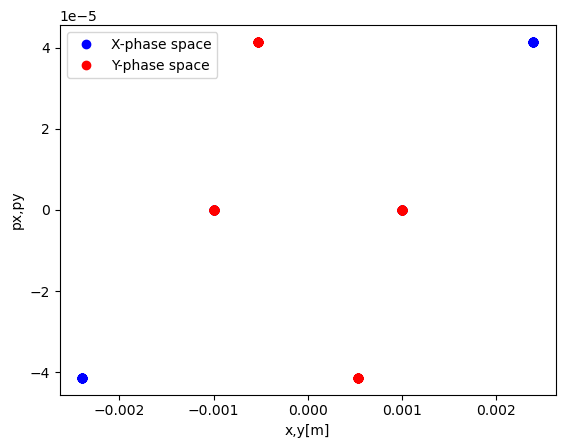

In [31]:
plt.rcParams['figure.dpi'] = 100
plt.plot(particle1['x'],particle1['px'],'ob',label='X-phase space')
plt.plot(particle1['y'],particle1['py'],'or',label='Y-phase space')
plt.xlabel('x,y[m]')
plt.ylabel('px,py')
plt.legend(loc='best')
#plt.xlim(-0.003,0.003)
#plt.ylim(-5e-5, 5e-5)

#### In order to understand better the plot, it is useful to plot the different turns with dfferent markers and only show the coordinates up to the fifth turn

(-5e-05, 5e-05)

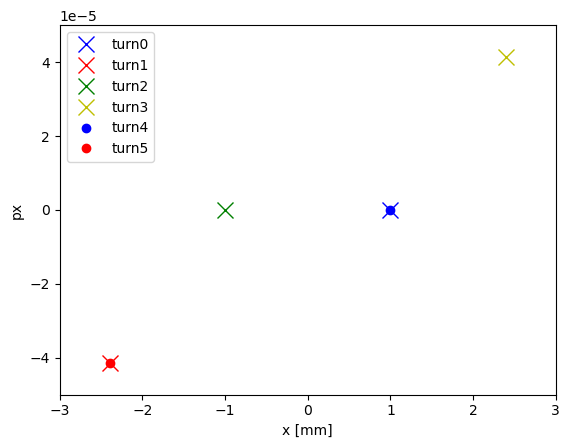

In [32]:
plt.rcParams['figure.dpi'] = 100
turn0=particle1[particle1["turn"]==0]
turn1=particle1[particle1["turn"]==1]
turn2=particle1[particle1["turn"]==2]
turn3=particle1[particle1["turn"]==3]
turn4=particle1[particle1["turn"]==4]
turn5=particle1[particle1["turn"]==5]
plt.plot(turn0['x']*1e3,turn0['px'],'xb',markersize=12,label='turn0')
plt.plot(turn1['x']*1e3,turn1['px'],'xr',markersize=12,label='turn1')
plt.plot(turn2['x']*1e3,turn2['px'],'xg',markersize=12,label='turn2')
plt.plot(turn3['x']*1e3,turn3['px'],'xy',markersize=12,label='turn3')
plt.plot(turn4['x']*1e3,turn4['px'],'ob',label='turn4')
plt.plot(turn5['x']*1e3,turn5['px'],'or',label='turn5')
plt.xlabel('x [mm]')
plt.ylabel('px')
plt.legend(loc='best')
plt.xlim(-3,3)
plt.ylim(-5e-5, 5e-5)

#### After each 4 turns the phase space coordinate repeats due to the tune being 0.25 

#### We can now plot the results for the second particle with an initial amplitude larger than the first one

In [35]:
particle2=madx.table['track.obs0001.p0002'].dframe()

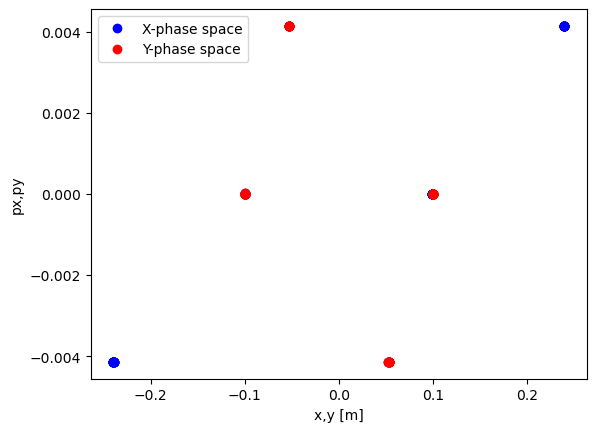

In [36]:
plt.rcParams['figure.dpi'] = 100
plt.plot(particle2['x'],particle2['px'],'ob',label='X-phase space')
plt.plot(particle2['y'],particle2['py'],'or',label='Y-phase space')
plt.xlabel('x,y [m]')
plt.ylabel('px,py')
plt.legend(loc='best')
#plt.xlim(-0.003,0.003)
#plt.ylim(-5e-5, 5e-5)

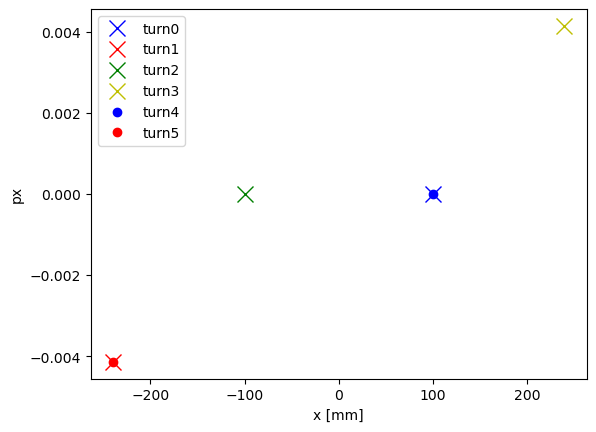

In [37]:
# Plot visualization options
plt.rcParams['figure.dpi'] = 100
turn0=particle2[particle2["turn"]==0]
turn1=particle2[particle2["turn"]==1]
turn2=particle2[particle2["turn"]==2]
turn3=particle2[particle2["turn"]==3]
turn4=particle2[particle2["turn"]==4]
turn5=particle2[particle2["turn"]==5]
plt.plot(turn0['x']*1e3,turn0['px'],'xb',markersize=12,label='turn0')
plt.plot(turn1['x']*1e3,turn1['px'],'xr',markersize=12,label='turn1')
plt.plot(turn2['x']*1e3,turn2['px'],'xg',markersize=12,label='turn2')
plt.plot(turn3['x']*1e3,turn3['px'],'xy',markersize=12,label='turn3')
plt.plot(turn4['x']*1e3,turn4['px'],'ob',label='turn4')
plt.plot(turn5['x']*1e3,turn5['px'],'or',label='turn5')
plt.xlabel('x [mm]')
plt.ylabel('px')
plt.legend(loc='best')

#### Answer: We obtain a similar plot as before but with larger amplitues.

#### In order to see the difference between the two particles, we can also plot the amplitude vs the turn number

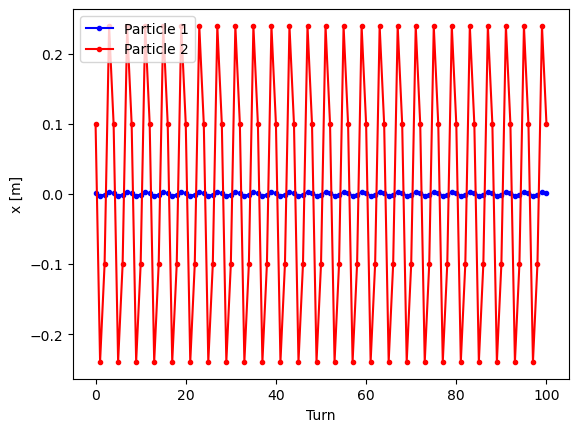

In [38]:
# We can also plot the amplitude of the particle vs the turn number
# Plot visualization options
plt.rcParams['figure.dpi'] = 100
plt.plot(particle1['turn'],particle1['x'],'.-b', label='Particle 1')
plt.plot(particle2['turn'],particle2['x'],'.-r', label='Particle 2')
plt.xlabel('Turn')
plt.ylabel('x [m]');
plt.legend(loc='best');

#### Both particles are stable, but with different amplitude

#### One can use this data to compute the tune by making a FFT analysis

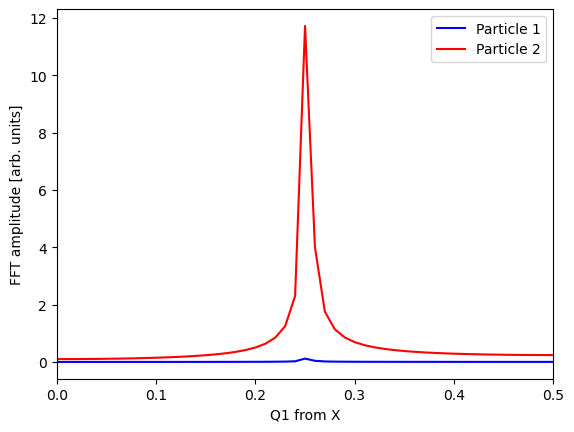

In [39]:
plt.rcParams['figure.dpi'] = 100
# The amplitude of the FFT of the particle amplitude oscilations gives as a mesure of the tune
plt.figure()
plt.plot(np.linspace(0,1,len(particle1['x'])), np.abs(np.fft.fft(particle1['x'])), 'b',label='Particle 1')
plt.plot(np.linspace(0,1,len(particle2['x'])), np.abs(np.fft.fft(particle2['x'])), 'r',label='Particle 2')
plt.xlabel('Q1 from X')
plt.ylabel('FFT amplitude [arb. units]');
plt.xlim(0,0.5)# The max. possible frequency for a given sampling rate that can be reconstruct is given by the Nyquist limit= sampling frecuency/2. In our case the sampling rate is 1, so the limit is 0.5.
#plt.grid()
plt.legend(loc='best');

#### 3. Repeat the tracking exercise but now for two of-momentum particles by adding a $\Delta p/p = 10^{-2}$ to the initial particles' conditions. How does the phase space look now? Is the tune still the same?

In [40]:
myString='''
//*************************************************//
!   TRACKING
//*************************************************//

track,dump,file='linear_machine_off_energy', DELTAP=0.01;
start, x= 1e-3, px=0, y= 1e-3, py=0;
start, x= 1e-1, px=0, y= 1e-1, py=0;
run,turns=100;
endtrack;

'''
madx.input(myString);

enter TRACK module
track_deltap:               0.01
  
iteration:   1 error:   2.199560E-02 deltap:   1.000000E-02
orbit:   2.278770E-02  3.342536E-04  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
  
iteration:   2 error:   4.510281E-17 deltap:   1.000000E-02
orbit:   2.278770E-02  3.342536E-04  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: tracksumm

    number       turn                  x                 px 
         1          0              0.001                  0 
         2          0                0.1                  0 
         1        100     0.002282598787    4.969782628e-05 
         2        100       0.1797793756     0.003794178386 

                 y                 py                  t                 pt 
             0.001                  0                  0     0.009999999911 
               0.1                  0                  0     0.009999999911 
  -0.0008810511785    3.780001354e-05     -0.05598160765     0.009999999911

#### Saving the off-momentum tracking data

In [42]:
off_momentum_particle1=madx.table['track.obs0001.p0001'].dframe()
off_momentum_particle2=madx.table['track.obs0001.p0002'].dframe()

#### Plot

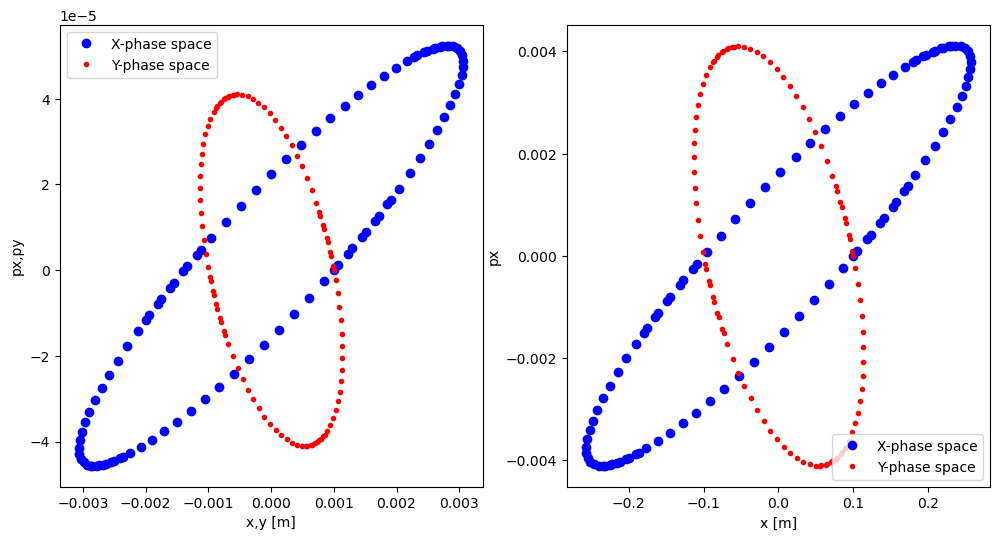

In [50]:
plt.rcParams['figure.dpi'] = 100

fig, (ax1,ax2)=plt.subplots(1,2, figsize=(12,6))
ax1.plot(off_momentum_particle1['x'],off_momentum_particle1['px'],'ob',label='X-phase space')
ax1.plot(off_momentum_particle1['y'],off_momentum_particle1['py'],'.r',label='Y-phase space')
ax1.set_xlabel('x,y [m]')
ax1.set_ylabel('px,py')
ax1.legend(loc='best')

ax2.plot(off_momentum_particle2['x'],off_momentum_particle2['px'],'ob',label='X-phase space')
ax2.plot(off_momentum_particle2['y'],off_momentum_particle2['py'],'.r',label='Y-phase space')
ax2.set_xlabel('x [m]')
ax2.set_ylabel('px')
ax2.legend(loc='best')

#### As we track off-momentum particles the tune is affected by the natural chromaticity of the FODO and it is not 0.25 anymore. The particles coordinates don't repeat each 4 turns anymore but the motion of the particle is still stable

#### The observed effect is small, however in machines with stronger quadrupoles the impact could be higher and the tune spread can lead to unstable motion due to resonances. Therefore, correction schemes are needed such as the one we will design in the next tutorial.